In [10]:
exp_mutuals = {
    "small": (69, 7),  # panel (a) in the first figure
    "medium": (166, 4),  # panel (b)
    "large": (594, 24),  # panel (c)
    "xlarge": (1598, 47),  # panel (d)
}

In [11]:
sc.version_table()

Software,Version
SuperScreen,0.12.1
Numpy,2.0.2
Numba,0.60.0
SciPy,1.13.1
matplotlib,3.9.4
IPython,8.18.1
Python,"3.9.0 (tags/v3.9.0:9cf6752, Oct 5 2020, 15:34:40) [MSC v.1927 64 bit (AMD64)]"
OS,nt [win32]
Number of CPUs,"Physical: 16, Logical: 22"
BLAS Info,Generic


In [12]:
%config InlineBackend.figure_formats = {"retina", "png"}
%matplotlib inline

import os

os.environ["OPENBLAS_NUM_THREADS"] = "1"

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 4)
plt.rcParams["font.size"] = 10

import superscreen as sc
from superscreen.geometry import circle, box

In [13]:
length_units = "um"
ro = 3  # outer radius
ri = 1  # inner radius
slit_width = 0.25
layer = sc.Layer("base", london_lambda=0.100, thickness=0.025, z0=0)

ring = circle(ro)
hole = circle(ri)
slit = box(slit_width, 1.5 * (ro - ri), center=(0, -(ro + ri) / 2))

film = sc.Polygon.from_difference(
    [ring, slit, hole], name="ring_with_slit", layer="base"
)
# # The above is equivalent to all of the following:
# film = sc.Polygon(
#     name="ring_with_slit", layer="base", points=ring
# ).difference(slit, hole)
# film = sc.Polygon(
#     name="ring_with_slit", layer="base", points=ring
# ).difference(slit).difference(hole)
# film = sc.Polygon(
#     name="ring_with_slit", layer="base", points=ring
# ).difference(sc.Polygon(points=hole).union(slit))

device = sc.Device(
    film.name,
    layers=[layer],
    films=[film],
    length_units=length_units,
)

In [14]:
print(device)

Device(
    "ring_with_slit", 
    layers=[
        Layer('base', Lambda=0.400, thickness=0.025, london_lambda=0.100, z0=0.000),
    ], 
    films=[
        Polygon(name='ring_with_slit', layer='base', points=<ndarray: shape=(263, 2)>),
    ], 
    holes=None, 
    terminals=None, 
    abstract_regions=None, 
    length_units="um",
)


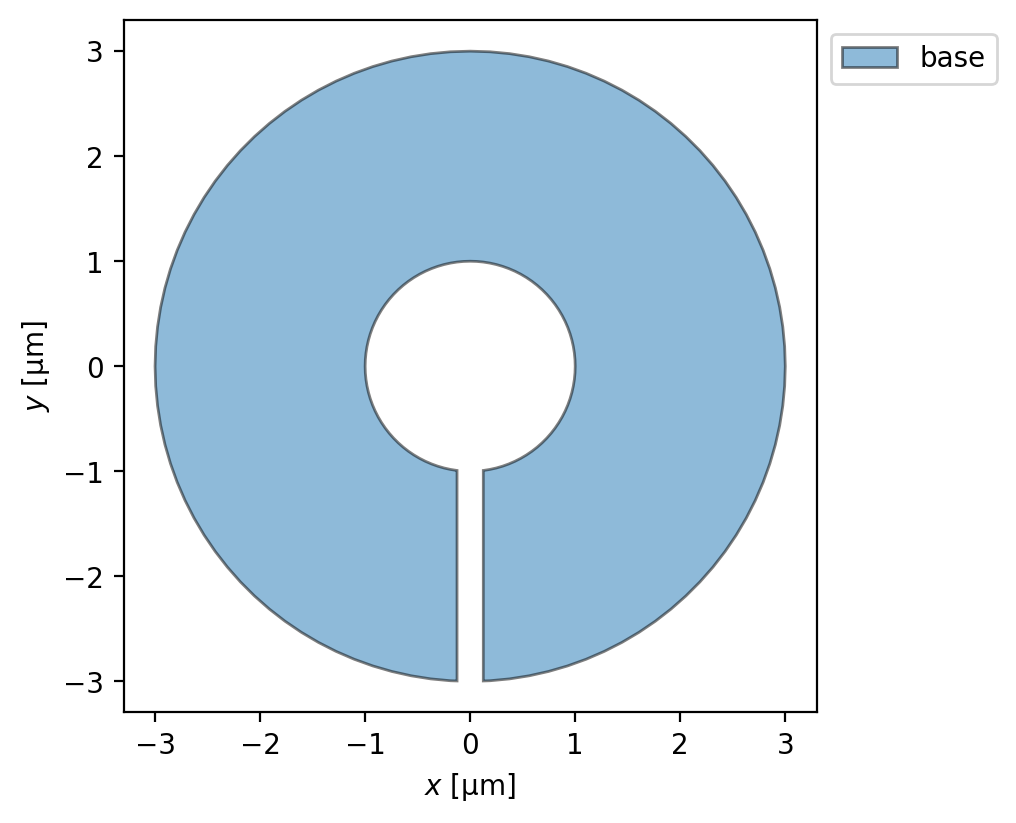